In [19]:
import pandas as pd

file_path = "EastWestAirlines.xlsx"
xls = pd.ExcelFile(file_path)
xls.sheet_names


['Description', 'data']

In [5]:
# Load the 'data' sheet which likely contains the actual dataset
df = pd.read_excel(file_path, sheet_name='data')

# Display basic information about the dataset
df.info(), df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


(None,
    ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
 0    1    28143           0          1          1          1          174   
 1    2    19244           0          1          1          1          215   
 2    3    41354           0          1          1          1         4123   
 3    4    14776           0          1          1          1          500   
 4    5    97752           0          4          1          1        43300   
 
    Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  Award?  
 0            1                  0                0               7000       0  
 1            2                  0                0               6968       0  
 2            4                  0                0               7034       0  
 3            1                  0                0               6952       0  
 4           26               2077                4               6935       1  )

In [7]:
#Columns Overview:
#ID#: Customer ID (unique identifier)

#Balance: Frequent flyer account balance

#Qual_miles: Miles earned in the past year through qualifying activity

#cc1_miles, cc2_miles, cc3_miles: Miles earned via 3 different credit card categories

#Bonus_miles: Total bonus miles earned

#Bonus_trans: Number of bonus mile transactions

#Flight_miles_12mo: Flight miles in the last 12 months

#Flight_trans_12: Flight transactions in the last 12 months

#Days_since_enroll: Days since enrollment

#Award?: Whether the customer has received an award (0 = No, 1 = Yes)



In [9]:
#Initial Observations:
#No missing values are present.

#All columns are integers.

#ID# is an identifier and should be excluded from modeling.

#Outliers and feature scaling need to be addressed.

#Exploratory Data Analysis (EDA) is necessary to reveal patterns and clusters.



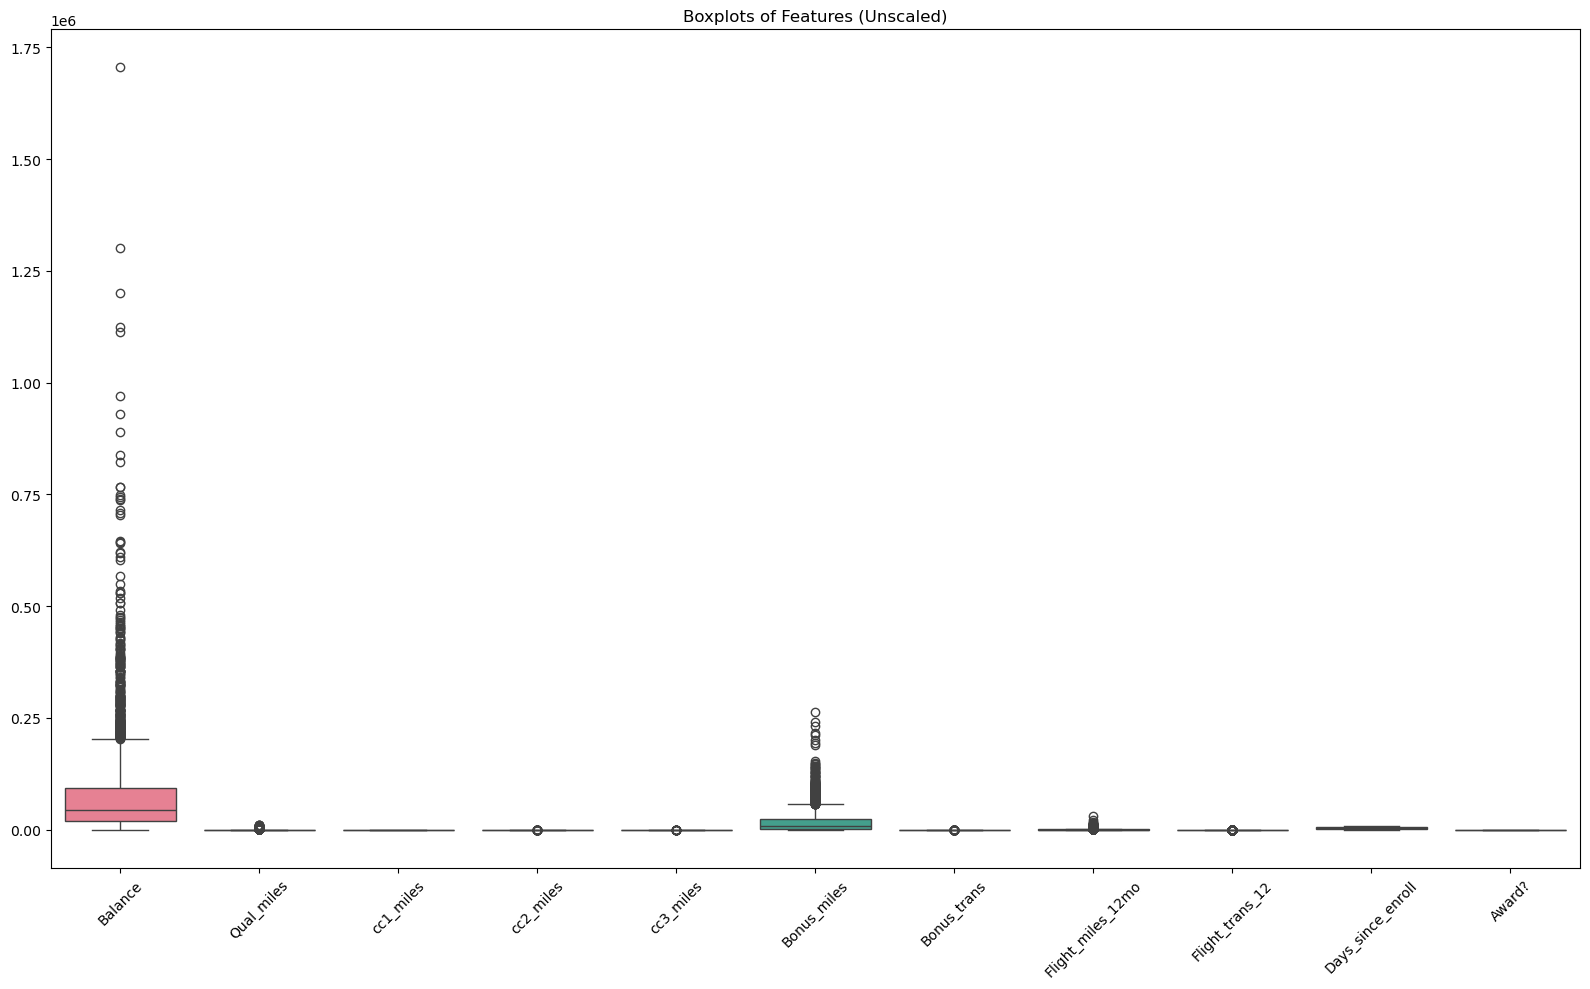

In [11]:
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

# Drop the ID column
df_clean = df.drop(columns=["ID#"])

# Visualize boxplots to detect outliers
plt.figure(figsize=(16, 10))
sns.boxplot(data=df_clean)
plt.title("Boxplots of Features (Unscaled)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [13]:
# Apply standard scaling
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_clean)

# Convert scaled data back to a DataFrame
df_scaled = pd.DataFrame(scaled_data, columns=df_clean.columns)

# Display the first few rows of the scaled data
df_scaled.head()


,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,-0.451141,-0.186299,-0.769578,-0.098242,-0.062767,-0.702786,-1.104065,-0.328603,-0.362168,1.395454,-0.766919
1,-0.539457,-0.186299,-0.769578,-0.098242,-0.062767,-0.701088,-0.999926,-0.328603,-0.362168,1.379957,-0.766919
2,-0.320031,-0.186299,-0.769578,-0.098242,-0.062767,-0.539253,-0.791649,-0.328603,-0.362168,1.411920,-0.766919
3,-0.583799,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286,-1.104065,-0.328603,-0.362168,1.372208,-0.766919
4,0.239678,-0.186299,1.409471,-0.098242,-0.062767,1.083121,1.499394,1.154932,0.692490,1.363975,1.303918


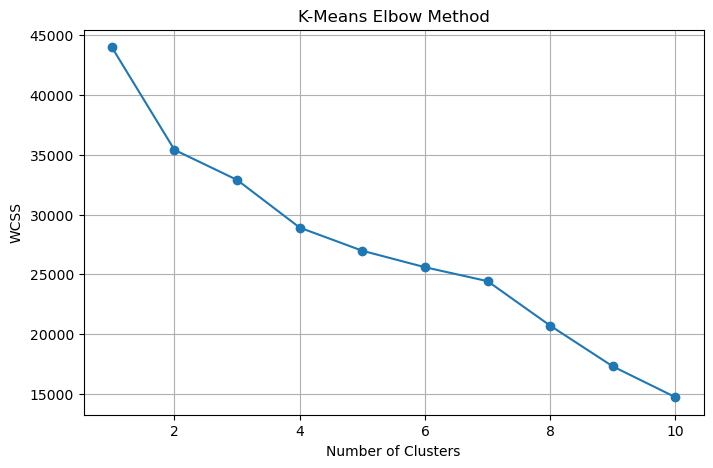

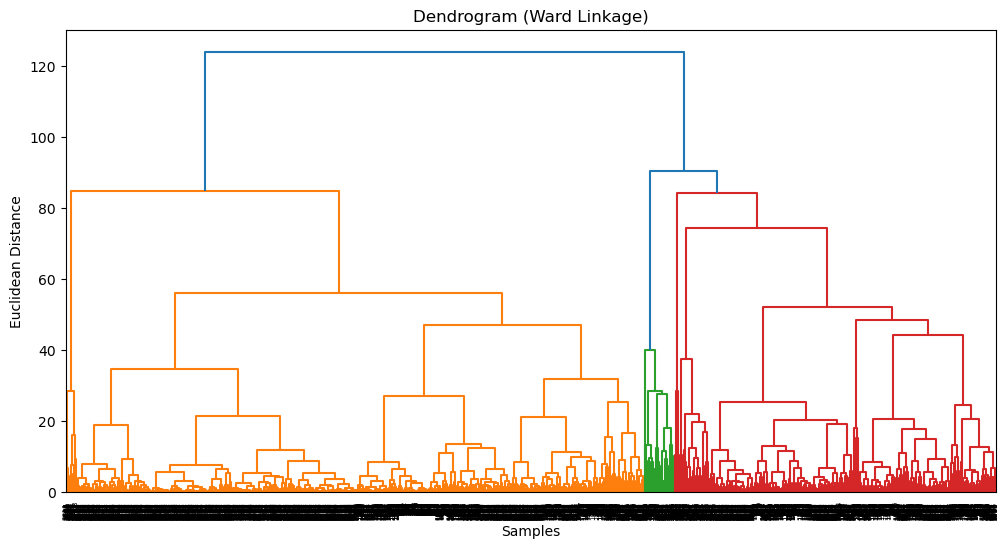

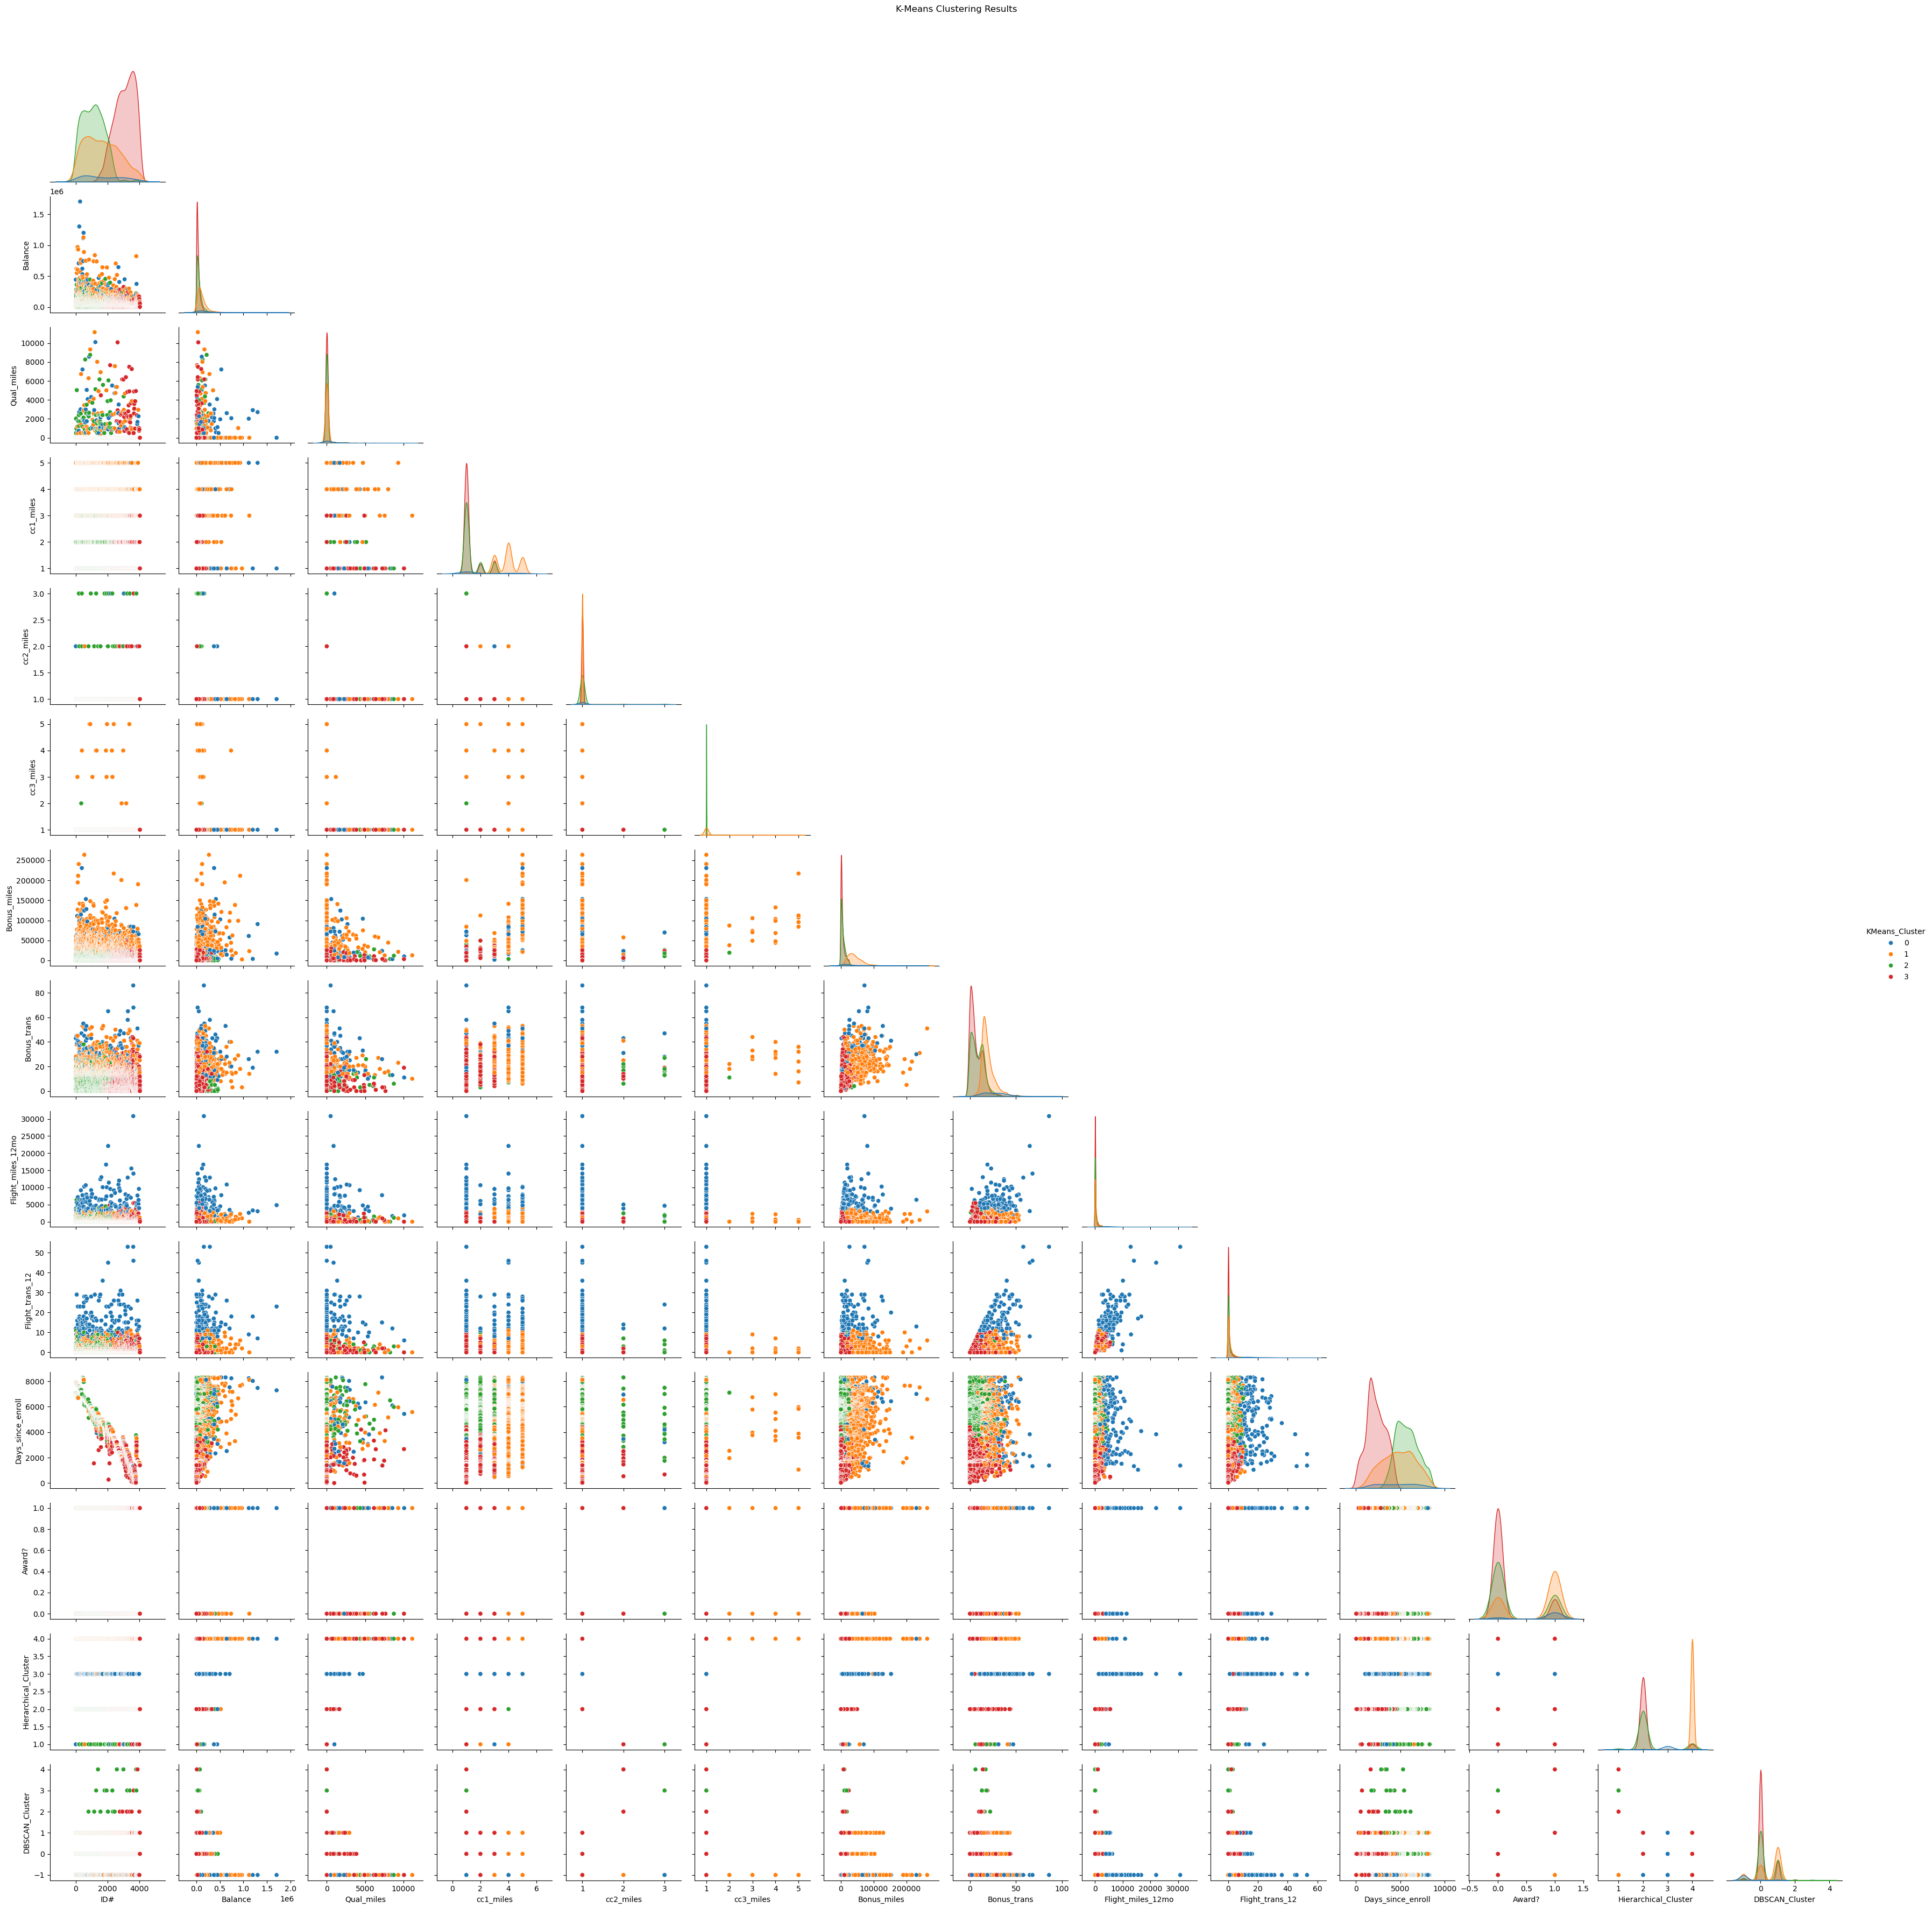

In [15]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_excel("EastWestAirlines.xlsx", sheet_name="data")

# Drop ID column
df_clean = df.drop(columns=["ID#"])

# Scale the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_clean)

# ----------------------------------
# 1. K-Means Clustering
# ----------------------------------
# Elbow method to determine optimal K
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('K-Means Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid()
plt.show()

# Final K-Means with chosen K
kmeans = KMeans(n_clusters=4, random_state=42)
df['KMeans_Cluster'] = kmeans.fit_predict(scaled_data)

# ----------------------------------
# 2. Hierarchical Clustering
# ----------------------------------
plt.figure(figsize=(12, 6))
dend = dendrogram(linkage(scaled_data, method='ward'))
plt.title('Dendrogram (Ward Linkage)')
plt.xlabel('Samples')
plt.ylabel('Euclidean Distance')
plt.show()

# Final Hierarchical clustering with chosen number of clusters
hc_clusters = fcluster(linkage(scaled_data, method='ward'), t=4, criterion='maxclust')
df['Hierarchical_Cluster'] = hc_clusters

# ----------------------------------
# 3. DBSCAN
# ----------------------------------
db = DBSCAN(eps=1.5, min_samples=5)
df['DBSCAN_Cluster'] = db.fit_predict(scaled_data)

# ----------------------------------
# Visualize K-Means Result
# ----------------------------------
sns.pairplot(df, hue='KMeans_Cluster', palette='tab10', corner=True)
plt.suptitle("K-Means Clustering Results", y=1.02)
plt.show()


In [14]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load and Preprocess the Data
df = pd.read_excel("EastWestAirlines.xlsx", sheet_name="data")
df_clean = df.drop(columns=["ID#"])

# Step 2: Standardize the Data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_clean)

# Step 3: K-Means Clustering
# Using 4 clusters as a common choice (adjust after elbow method if needed)
kmeans = KMeans(n_clusters=4, random_state=42)
df['KMeans_Cluster'] = kmeans.fit_predict(scaled_data)

# Step 4: Hierarchical Clustering
linkage_matrix = linkage(scaled_data, method='ward')
df['Hierarchical_Cluster'] = fcluster(linkage_matrix, t=4, criterion='maxclust')

# Step 5: DBSCAN Clustering
# You may need to tune eps and min_samples depending on results
dbscan = DBSCAN(eps=1.5, min_samples=5)
df['DBSCAN_Cluster'] = dbscan.fit_predict(scaled_data)

# Step 6: Output Clustering Result Summary
print("K-Means Cluster Counts:")
print(df['KMeans_Cluster'].value_counts(), "\n")

print("Hierarchical Cluster Counts:")
print(df['Hierarchical_Cluster'].value_counts(), "\n")

print("DBSCAN Cluster Counts (Note: -1 = Noise):")
print(df['DBSCAN_Cluster'].value_counts())

# Step 7: (Optional) Save Results to Excel
df.to_excel("Clustered_EastWestAirlines.xlsx", index=False)


K-Means Cluster Counts:
KMeans_Cluster
3    1502
2    1236
1    1105
0     156
Name: count, dtype: int64 

Hierarchical Cluster Counts:
Hierarchical_Cluster
2    2446
4    1380
3     130
1      43
Name: count, dtype: int64 

DBSCAN Cluster Counts (Note: -1 = Noise):
DBSCAN_Cluster
 0    2411
 1    1250
-1     310
 2      15
 3       8
 4       5
Name: count, dtype: int64


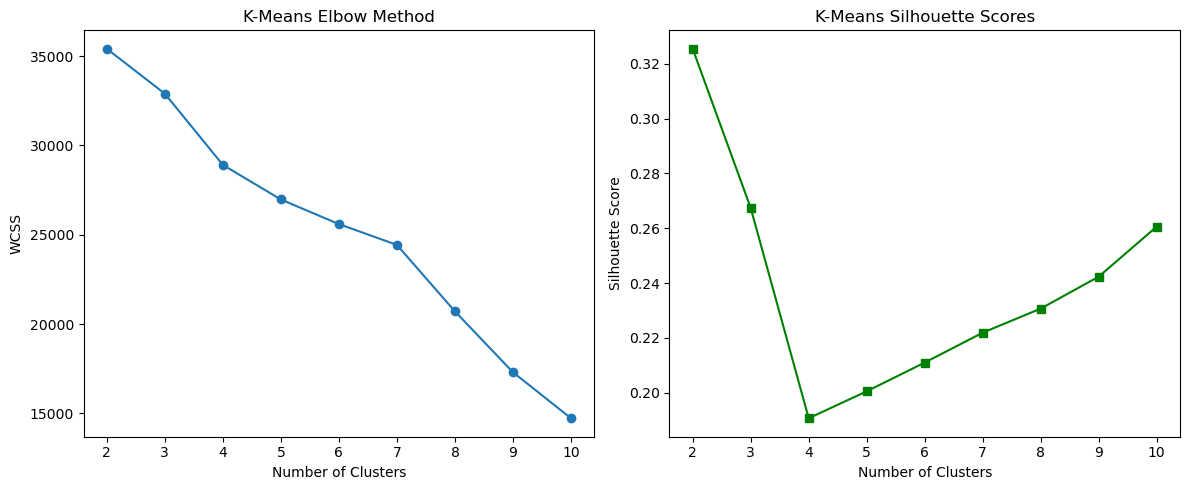

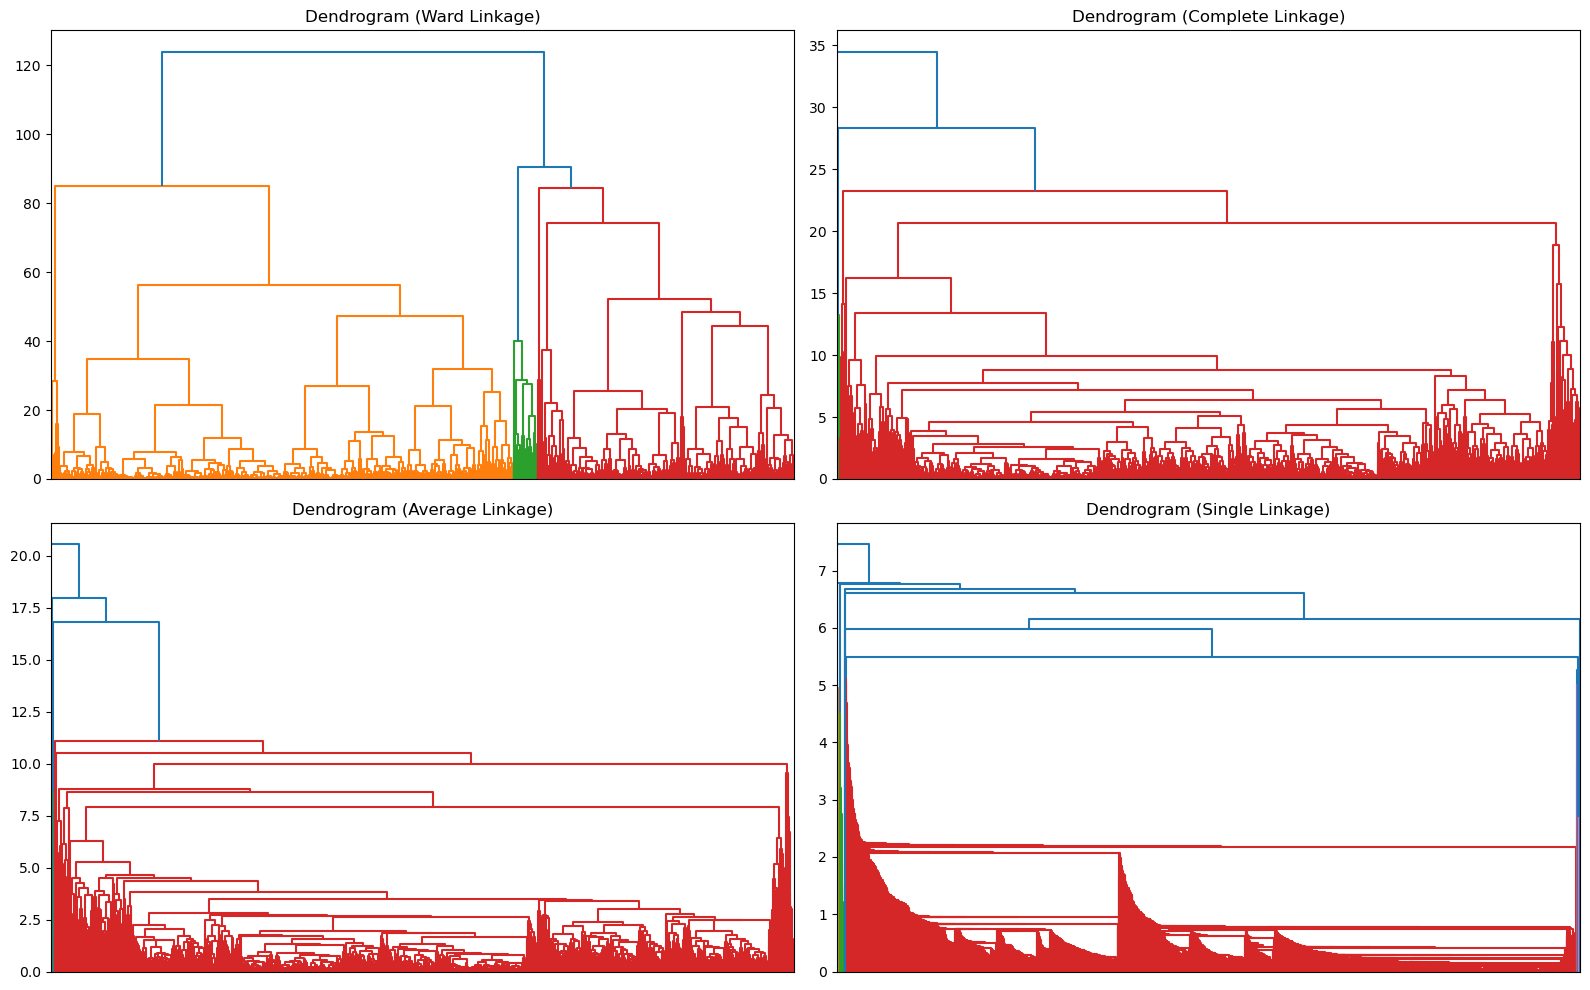

Hierarchical Clustering Silhouette Scores:
Ward linkage: Silhouette Score = 0.308
Complete linkage: Silhouette Score = 0.599
Average linkage: Silhouette Score = 0.773
Single linkage: Silhouette Score = 0.538

DBSCAN Clustering Results:
eps=0.5, min_samples=3 => clusters: 40, noise: 1228, silhouette: 0.075
eps=0.5, min_samples=5 => clusters: 16, noise: 1413, silhouette: 0.144
eps=0.5, min_samples=10 => clusters: 9, noise: 1722, silhouette: 0.166
eps=1.0, min_samples=3 => clusters: 10, noise: 508, silhouette: 0.172
eps=1.0, min_samples=5 => clusters: 6, noise: 554, silhouette: 0.282
eps=1.0, min_samples=10 => clusters: 3, noise: 675, silhouette: 0.318
eps=1.5, min_samples=3 => clusters: 9, noise: 277, silhouette: 0.262
eps=1.5, min_samples=5 => clusters: 5, noise: 310, silhouette: 0.294
eps=1.5, min_samples=10 => clusters: 3, noise: 377, silhouette: 0.298
eps=2.0, min_samples=3 => clusters: 12, noise: 141, silhouette: 0.271
eps=2.0, min_samples=5 => clusters: 6, noise: 179, silhouette: 0

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

# Load and preprocess data
df = pd.read_excel("EastWestAirlines.xlsx", sheet_name="data")
df_clean = df.drop(columns=["ID#"])
scaled_data = StandardScaler().fit_transform(df_clean)

# -------------------------------
# 1. K-Means Clustering Analysis
# -------------------------------
wcss = []
silhouette_scores = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(scaled_data)
    wcss.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(scaled_data, labels))

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(K_range, wcss, marker='o')
plt.title("K-Means Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")

plt.subplot(1, 2, 2)
plt.plot(K_range, silhouette_scores, marker='s', color='green')
plt.title("K-Means Silhouette Scores")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")

plt.tight_layout()
plt.show()

# Apply final KMeans with optimal K
kmeans_final = KMeans(n_clusters=4, random_state=42)
df['KMeans_Cluster'] = kmeans_final.fit_predict(scaled_data)

# --------------------------------------
# 2. Hierarchical Clustering Evaluation
# --------------------------------------
linkage_methods = ['ward', 'complete', 'average', 'single']
plt.figure(figsize=(16, 10))

for i, method in enumerate(linkage_methods):
    plt.subplot(2, 2, i + 1)
    Z = linkage(scaled_data, method=method)
    dendrogram(Z, no_labels=True)
    plt.title(f"Dendrogram ({method.title()} Linkage)")

plt.tight_layout()
plt.show()

print("Hierarchical Clustering Silhouette Scores:")
for method in linkage_methods:
    Z = linkage(scaled_data, method=method)
    clusters = fcluster(Z, t=4, criterion='maxclust')
    score = silhouette_score(scaled_data, clusters)
    print(f"{method.title()} linkage: Silhouette Score = {score:.3f}")
df['Hierarchical_Cluster'] = fcluster(linkage(scaled_data, method='ward'), 4, criterion='maxclust')

# -------------------------------
# 3. DBSCAN Clustering Analysis
# -------------------------------
eps_values = [0.5, 1.0, 1.5, 2.0]
min_samples_values = [3, 5, 10]

print("\nDBSCAN Clustering Results:")
for eps in eps_values:
    for min_samples in min_samples_values:
        db = DBSCAN(eps=eps, min_samples=min_samples)
        labels = db.fit_predict(scaled_data)
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        n_noise = list(labels).count(-1)

        # Avoid silhouette score if not enough clusters
        if n_clusters > 1:
            mask = labels != -1
            sil = silhouette_score(scaled_data[mask], labels[mask])
        else:
            sil = -1
        print(f"eps={eps}, min_samples={min_samples} => clusters: {n_clusters}, noise: {n_noise}, silhouette: {sil:.3f}")

# Final DBSCAN model
final_dbscan = DBSCAN(eps=1.5, min_samples=5)
df['DBSCAN_Cluster'] = final_dbscan.fit_predict(scaled_data)

# --------------------------------------
# Save final clustered dataset (optional)
# --------------------------------------
df.to_excel("Clustered_EastWestAirlines_Output.xlsx", index=False)


In [10]:
# -------------------------------
# Cluster Profiling for KMeans
# -------------------------------
print("\n--- KMeans Cluster Profiling ---")
kmeans_profile = df.groupby('KMeans_Cluster').mean(numeric_only=True)
print(kmeans_profile)

# -------------------------------
# Cluster Profiling for Hierarchical
# -------------------------------
print("\n--- Hierarchical Cluster Profiling ---")
hierarchical_profile = df.groupby('Hierarchical_Cluster').mean(numeric_only=True)
print(hierarchical_profile)

# -------------------------------
# Cluster Profiling for DBSCAN (exclude noise)
# -------------------------------
print("\n--- DBSCAN Cluster Profiling (Excluding Noise) ---")
dbscan_profile = df[df['DBSCAN_Cluster'] != -1].groupby('DBSCAN_Cluster').mean(numeric_only=True)
print(dbscan_profile)



--- KMeans Cluster Profiling ---
                        ID#        Balance  Qual_miles  cc1_miles  cc2_miles  \
KMeans_Cluster                                                                 
0               1750.333333  193291.147436  795.455128   2.179487   1.038462   
1               1658.865158  122119.899548  151.724887   3.885068   1.002715   
2               1101.367314   59693.586570  112.733010   1.372168   1.031553   
3               3055.842210   36920.458056   96.690413   1.269640   1.006658   

                cc3_miles   Bonus_miles  Bonus_trans  Flight_miles_12mo  \
KMeans_Cluster                                                            
0                1.000000  32292.288462    27.628205        5530.230769   
1                1.043439  43772.394570    19.398190         366.520362   
2                1.000809   6311.116505     8.456311         258.830097   
3                1.000000   4897.208389     6.790280         167.861518   

                Flight_trans_12  D

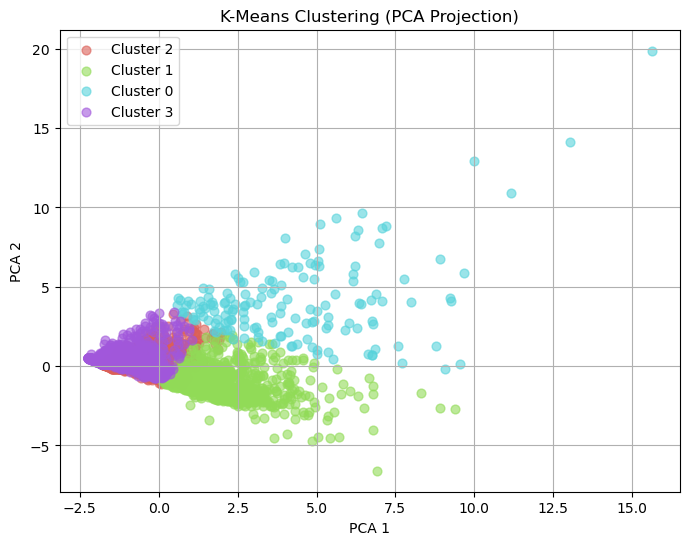

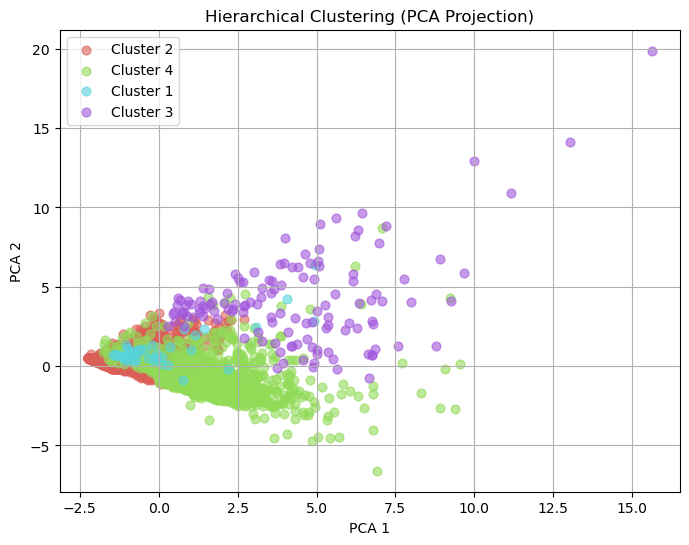

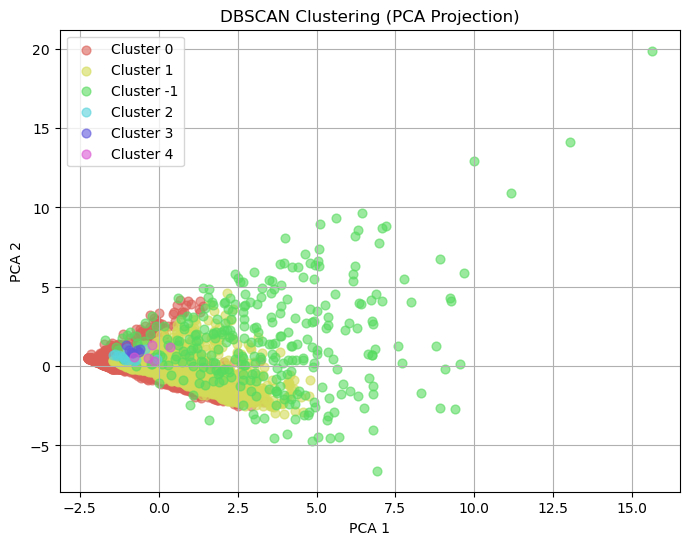

In [11]:
from sklearn.decomposition import PCA

# Reduce dimensionality for 2D plotting
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

df['PCA1'] = pca_data[:, 0]
df['PCA2'] = pca_data[:, 1]

# Plotting function
def plot_clusters(df, label_col, title):
    plt.figure(figsize=(8, 6))
    unique_labels = df[label_col].unique()
    palette = sns.color_palette("hls", len(unique_labels))
    
    for label, color in zip(unique_labels, palette):
        subset = df[df[label_col] == label]
        plt.scatter(subset['PCA1'], subset['PCA2'], 
                    label=f"Cluster {label}", s=40, alpha=0.6, c=[color])
    
    plt.title(title)
    plt.xlabel('PCA 1')
    plt.ylabel('PCA 2')
    plt.legend()
    plt.grid(True)
    plt.show()

# Visualizations
plot_clusters(df, 'KMeans_Cluster', "K-Means Clustering (PCA Projection)")
plot_clusters(df, 'Hierarchical_Cluster', "Hierarchical Clustering (PCA Projection)")
plot_clusters(df, 'DBSCAN_Cluster', "DBSCAN Clustering (PCA Projection)")


In [12]:
from sklearn.metrics import silhouette_score

# Silhouette score for K-Means
kmeans_labels = df['KMeans_Cluster']
kmeans_silhouette = silhouette_score(scaled_data, kmeans_labels)
print(f"K-Means Silhouette Score: {kmeans_silhouette:.3f}")

# Silhouette score for DBSCAN (excluding noise points)
dbscan_labels = df['DBSCAN_Cluster']
if len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0) > 1:
    mask = dbscan_labels != -1
    dbscan_silhouette = silhouette_score(scaled_data[mask], dbscan_labels[mask])
    print(f"DBSCAN Silhouette Score (excluding noise): {dbscan_silhouette:.3f}")
else:
    print("DBSCAN: Not enough clusters to calculate silhouette score.")


K-Means Silhouette Score: 0.191
DBSCAN Silhouette Score (excluding noise): 0.294
